In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.metrics import r2_score

from utils import calc_metrics, plot_subst_freqs

In [2]:
def plot_subst_freqs_linear(aa_subst, title=''):
    aa_subst = aa_subst.copy()

    y_true, y_pred = aa_subst['nobs_freqs'], aa_subst['nexp_freqs']
    cor_res = spearmanr(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"Spearman correlation: {cor_res.correlation:.3f} (p-value: {cor_res.pvalue:.3g})")

    plt.figure(figsize=(8, 8))
    ax = sns.regplot(aa_subst, color='blue', scatter_kws={'alpha':0.5, 's':50},
                y='nobs_freqs', x='nexp_freqs')

    _max = round(max(y_true), 2)
    plt.plot([0, _max], [0, _max], color='black', linestyle='--',)
    plt.ylabel('Observed AA substitution frequencies', fontsize=16)
    plt.xlabel('Predicted AA substitution frequencies', fontsize=16)
    plt.grid()
    # plt.ylabel('Наблюдаемые частоты замещений аминокислот', fontsize=14)
    # plt.xlabel('Ожидаемые частоты замещений аминокислот', fontsize=14)
    plt.title(title, fontsize=16)
    # plt.legend(title=f"spearmanr={cor_res.correlation:.2f} (p={cor_res.pvalue:.1g})", title_fontsize=14)
    plt.legend(title=f"$R^2$ = {r2:.2f}", title_fontsize=16)
    # plt.savefig('./figures/obs_exp_aa_freqs_20A.pdf')
    plt.show()
    return ax

## spectra are clade specific genome-wide

In [4]:
aa_subst_total_df = pd.read_csv('data/aa_subst_total_rates.csv', index_col=0)
aa_subst_total_df

,aa2,nobs,ref_aa1_freq,nobs_scaled,rate_exp,nexp,diff,pe,nobs_freqs,nexp_freqs,obs_relative_freq,grantham_distance,clade,rate_cat
aa1,,,,,,,,,,,,,,
Ala,Asp,13,0.055476,11.89080,0.040682,11.06420,0.826618,6.95174,0.001423,0.001324,1.074710,126,20A,2
Ala,Glu,5,0.055476,4.57339,0.040682,11.06420,-6.490810,-141.92500,0.000547,0.001324,0.413350,107,20A,2
Ala,Gly,4,0.055476,3.65871,0.028605,7.77965,-4.120940,-112.63400,0.000438,0.000931,0.470293,60,20A,2
Ala,Pro,11,0.055476,10.06150,0.062066,16.87990,-6.818460,-67.76810,0.001204,0.002020,0.596061,27,20A,2
Ala,Ser,152,0.055476,139.03100,1.288300,350.37600,-211.345000,-152.01300,0.016636,0.041926,0.396805,99,20A,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Val,Gly,94,0.080222,59.75270,0.026752,58.29490,1.457730,2.43960,0.000920,0.000898,1.025010,109,24A,total
Val,Ile,1551,0.080222,985.91900,0.383644,836.00300,149.916000,15.20570,0.015187,0.012877,1.179320,29,24A,total
Val,Leu,884,0.080222,561.92900,0.402192,876.42200,-314.492000,-55.96650,0.008656,0.013500,0.641163,32,24A,total


In [5]:
i=0
for _, gr in aa_subst_total_df.groupby(['clade', 'rate_cat']):
    cur_metrics = calc_metrics(gr)
    r2 = cur_metrics['r2']
    i+=1
    # if i > 5:
    #     break
    # if r2<-1.6:
        # gr['nexp_freqs'] = gr['nobs_freqs'].mean()
    if r2>.8:
        print(r2)
        break
gr

,aa2,nobs,ref_aa1_freq,nobs_scaled,rate_exp,nexp,diff,pe,nobs_freqs,nexp_freqs,obs_relative_freq,grantham_distance,clade,rate_cat
aa1,,,,,,,,,,,,,,
Ala,Asp,70,0.067604,52.8018,0.071289,155.3470,-102.54500,-194.2070,0.000813,0.002393,0.339896,126,24A,total
Ala,Glu,36,0.067604,27.1552,0.071289,155.3470,-128.19200,-472.0700,0.000418,0.002393,0.174804,107,24A,total
Ala,Gly,42,0.067604,31.6811,0.023920,52.1237,-20.44260,-64.5262,0.000488,0.000803,0.607806,60,24A,total
Ala,Pro,44,0.067604,33.1897,0.059498,129.6520,-96.46260,-290.6400,0.000511,0.001997,0.255990,27,24A,total
Ala,Ser,1221,0.067604,921.0140,0.685389,1493.5400,-572.52400,-62.1624,0.014187,0.023006,0.616666,99,24A,total
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Val,Gly,94,0.080222,59.7527,0.026752,58.2949,1.45773,2.4396,0.000920,0.000898,1.025010,109,24A,total
Val,Ile,1551,0.080222,985.9190,0.383644,836.0030,149.91600,15.2057,0.015187,0.012877,1.179320,29,24A,total
Val,Leu,884,0.080222,561.9290,0.402192,876.4220,-314.49200,-55.9665,0.008656,0.013500,0.641163,32,24A,total


In [6]:
print('check that single value have zero R2:')
gr['nexp_freqs'] = gr['nobs_freqs'].mean()
r2_score(gr['nobs_freqs'], gr['nexp_freqs'])

check that single value have zero R2:


0.0

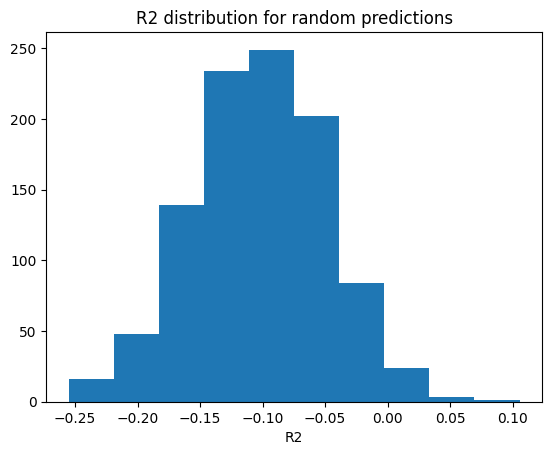

In [7]:
_d = []
for _ in range(1000):
    gr['nexp_freqs'] = np.random.random(len(gr))
    gr['nexp_freqs'] /= gr['nexp_freqs'].sum()
    r2 = r2_score(gr['nobs_freqs'], gr['nexp_freqs'])
    _d.append(r2)
plt.hist(_d)
plt.title('R2 distribution for random predictions')
plt.xlabel('R2')
plt.show()

### examples

In [8]:
data = []
for (cur_clade, cur_rate_cat), gr in aa_subst_total_df.groupby(['clade', 'rate_cat']):
    cur_metrics = calc_metrics(gr)
    r2 = cur_metrics['r2']
    data.append({'clade': cur_clade, 'rate_cat': cur_rate_cat, 'r2': r2})
r2_df = pd.DataFrame(data)
r2_df

,clade,rate_cat,r2
0,20A,1,-1.654782
1,20A,2,-1.031231
2,20A,3,-0.128908
3,20A,4,0.501484
4,20A,5,-0.015122
...,...,...,...
138,24A,2,-1.241423
139,24A,3,-0.439473
140,24A,4,0.544845
141,24A,5,-0.020677


/tmp/ipykernel_44411/1599686963.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aas['nobs_freqs'] += 1e-5
/tmp/ipykernel_44411/1599686963.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aas['nexp_freqs'] += 1e-5
/home/kpotoh/sars-cov-2/1sars-cov-2/utils.py:631: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f"$R^2$ = {r2:.2f}", title_fontsize=16)
/tmp/ipykerne

-0.02428050010280991
Pearson correlation: 0.636 (p-value: 2.31e-18)
Spearman correlation: 0.744 (p-value: 1.03e-27)


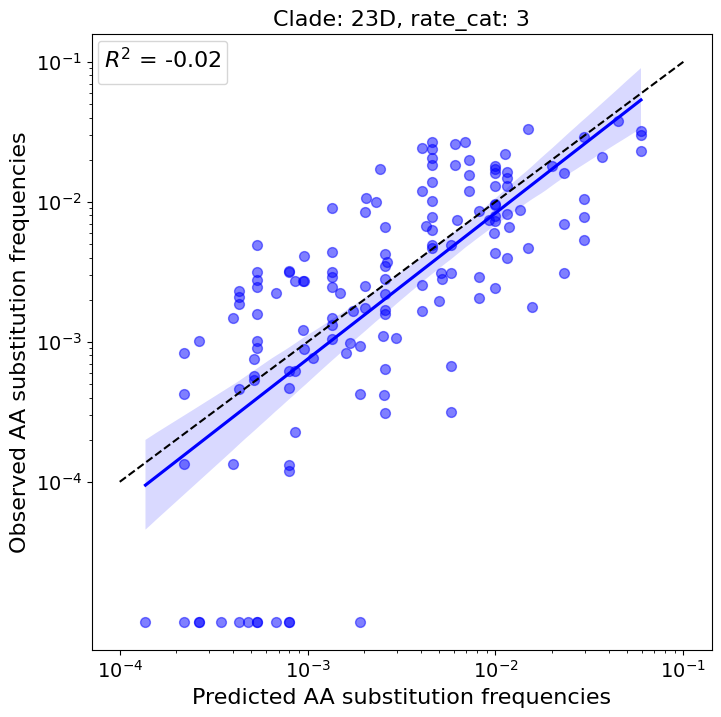

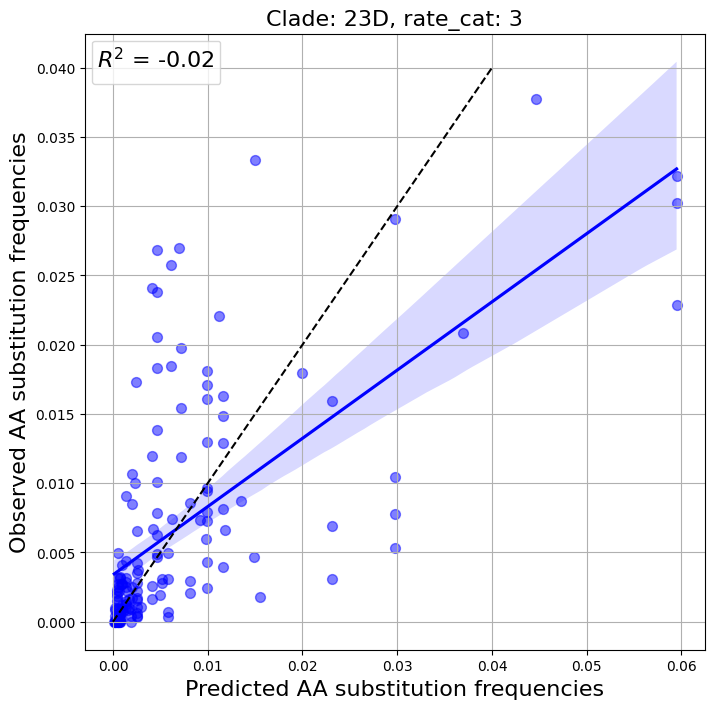

,aa2,nobs,ref_aa1_freq,nobs_scaled,rate_exp,nexp,diff,pe,nobs_freqs,nexp_freqs,obs_relative_freq,grantham_distance,clade,rate_cat
aa1,,,,,,,,,,,,,,
Ser,Trp,0,0.000000,0.000000,0.003806,0.677642,-0.677642,-inf,0.000010,0.000137,0.000000,177,23D,3
Leu,Trp,0,0.000000,0.000000,0.006306,1.122750,-1.122750,-inf,0.000010,0.000221,0.000000,61,23D,3
Ile,Arg,1,0.080177,0.656236,0.006306,1.122750,-0.466515,-71.0895,0.000133,0.000221,0.584489,97,23D,3
Met,Arg,2,0.047349,2.222450,0.006306,1.122750,1.099700,49.4814,0.000427,0.000221,1.979470,91,23D,3
Trp,Gly,1,0.011995,4.386420,0.006306,1.122750,3.263670,74.4039,0.000833,0.000221,3.906850,184,23D,3
His,Asp,0,0.000000,0.000000,0.007612,1.355280,-1.355280,-inf,0.000010,0.000264,0.000000,81,23D,3
Thr,Arg,0,0.000000,0.000000,0.007612,1.355280,-1.355280,-inf,0.000010,0.000264,0.000000,71,23D,3
Gln,Glu,4,0.039141,5.376910,0.007612,1.355280,4.021620,74.7943,0.001019,0.000264,3.967360,29,23D,3
Cys,Trp,0,0.000000,0.000000,0.010113,1.800390,-1.800390,-inf,0.000010,0.000348,0.000000,215,23D,3


In [13]:
cur_clade, cur_rate_cat = r2_df.query("-0.1<r2<0").sample(1)[['clade', 'rate_cat']].iloc[0]
aas = aa_subst_total_df.query("clade==@cur_clade and rate_cat==@cur_rate_cat")
aas['nobs_freqs'] += 1e-5
aas['nexp_freqs'] += 1e-5
plot_subst_freqs(aas, title=f'Clade: {cur_clade}, rate_cat: {cur_rate_cat}')
plot_subst_freqs_linear(aas, title=f'Clade: {cur_clade}, rate_cat: {cur_rate_cat}')
aas.sort_values('nexp_freqs', ascending=True).head(10)

/tmp/ipykernel_44411/4238732406.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aas['nobs_freqs'] += 1e-5
/tmp/ipykernel_44411/4238732406.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aas['nexp_freqs'] += 1e-5
/home/kpotoh/sars-cov-2/1sars-cov-2/utils.py:631: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f"$R^2$ = {r2:.2f}", title_fontsize=16)
/tmp/ipykerne

-0.907450461918591
Pearson correlation: 0.441 (p-value: 1.63e-08)
Spearman correlation: 0.655 (p-value: 1.02e-19)


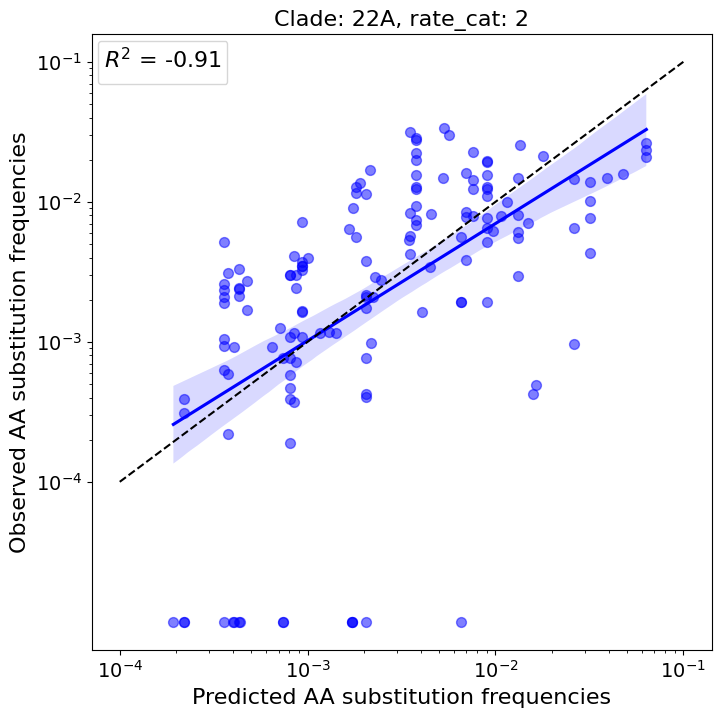

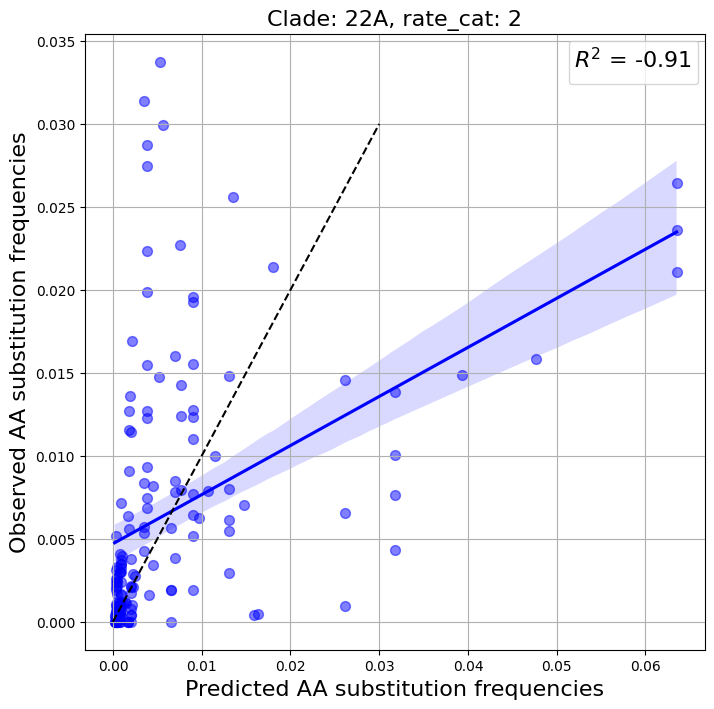

,aa2,nobs,ref_aa1_freq,nobs_scaled,rate_exp,nexp,diff,pe,nobs_freqs,nexp_freqs,obs_relative_freq,grantham_distance,clade,rate_cat
aa1,,,,,,,,,,,,,,
Ser,Trp,0,0.000000,0.00000,0.005477,0.686301,-0.686301,-inf,0.000010,0.000193,0.00000,177,22A,2
Leu,Trp,2,0.071352,1.43117,0.006280,0.786936,0.644232,45.0144,0.000392,0.000220,1.81866,61,22A,2
Ile,Arg,0,0.000000,0.00000,0.006280,0.786936,-0.786936,-inf,0.000010,0.000220,0.00000,97,22A,2
Met,Arg,1,0.045064,1.13301,0.006280,0.786936,0.346072,30.5445,0.000312,0.000220,1.43977,91,22A,2
Trp,Gly,0,0.000000,0.00000,0.006280,0.786936,-0.786936,-inf,0.000010,0.000220,0.00000,184,22A,2
Asn,Thr,9,0.058476,7.85830,0.010478,1.313090,6.545210,83.2904,0.002106,0.000360,5.98459,65,22A,2
Asn,His,11,0.058476,9.60458,0.010478,1.313090,8.291500,86.3285,0.002571,0.000360,7.31450,68,22A,2
Asp,Ala,10,0.057940,8.81229,0.010478,1.313090,7.499200,85.0993,0.002360,0.000360,6.71112,126,22A,2
Glu,Ala,31,0.082082,19.28340,0.010478,1.313090,17.970300,93.1906,0.005152,0.000360,14.68550,107,22A,2


In [14]:
cur_clade, cur_rate_cat = r2_df.query("-1<r2<0").sample(1)[['clade', 'rate_cat']].iloc[0]
aas = aa_subst_total_df.query("clade==@cur_clade and rate_cat==@cur_rate_cat")
aas['nobs_freqs'] += 1e-5
aas['nexp_freqs'] += 1e-5
plot_subst_freqs(aas, title=f'Clade: {cur_clade}, rate_cat: {cur_rate_cat}')
plot_subst_freqs_linear(aas, title=f'Clade: {cur_clade}, rate_cat: {cur_rate_cat}')
aas.sort_values('nexp_freqs', ascending=True).head(10)

/tmp/ipykernel_44411/3876328410.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aas['nobs_freqs'] += 1e-5
/tmp/ipykernel_44411/3876328410.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aas['nexp_freqs'] += 1e-5
/home/kpotoh/sars-cov-2/1sars-cov-2/utils.py:631: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f"$R^2$ = {r2:.2f}", title_fontsize=16)
/tmp/ipykerne

-1.7164000140803455
Pearson correlation: 0.315 (p-value: 8.73e-05)
Spearman correlation: 0.569 (p-value: 2.98e-14)


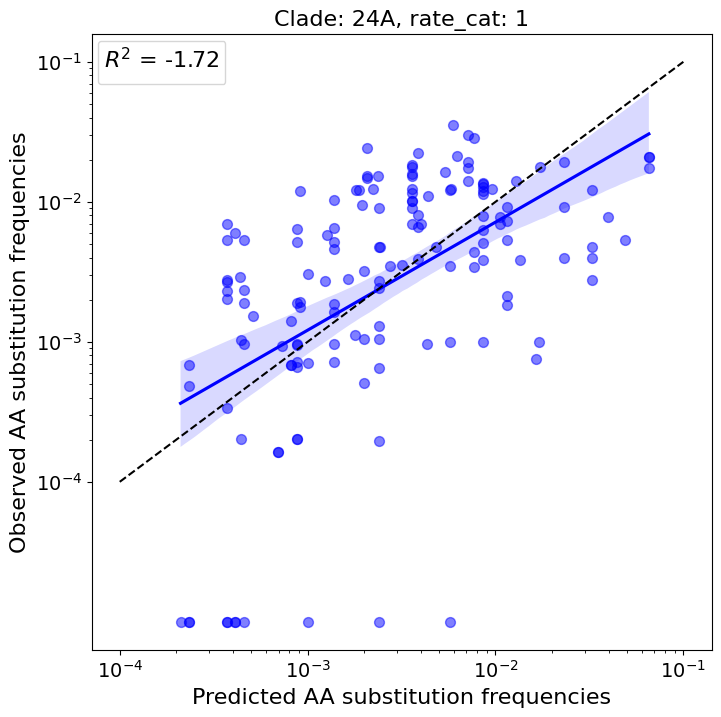

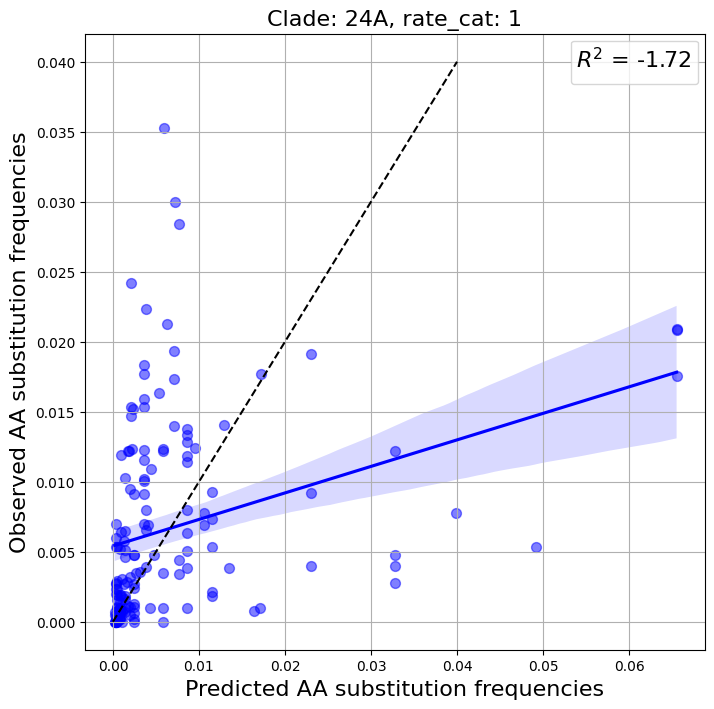

,aa2,nobs,ref_aa1_freq,nobs_scaled,rate_exp,nexp,diff,pe,nobs_freqs,nexp_freqs,obs_relative_freq,grantham_distance,clade,rate_cat
aa1,,,,,,,,,,,,,,
Ser,Trp,0,0.000000,0.00000,0.005980,0.767564,-0.767564,-inf,0.000010,0.000211,0.00000,177,24A,1
Leu,Trp,4,0.109466,1.79587,0.006688,0.858441,0.937433,52.1993,0.000480,0.000234,2.09202,61,24A,1
Ile,Arg,0,0.000000,0.00000,0.006688,0.858441,-0.858441,-inf,0.000010,0.000234,0.00000,97,24A,1
Met,Arg,2,0.038075,2.58157,0.006688,0.858441,1.723130,66.7473,0.000685,0.000234,3.00728,91,24A,1
Trp,Gly,0,0.000000,0.00000,0.006688,0.858441,-0.858441,-inf,0.000010,0.000234,0.00000,184,24A,1
Asn,Thr,15,0.072713,10.13850,0.010782,1.383980,8.754550,86.3493,0.002661,0.000372,7.32565,65,24A,1
Asn,His,13,0.072713,8.78672,0.010782,1.383980,7.402740,84.2492,0.002308,0.000372,6.34889,68,24A,1
Asp,Ala,23,0.055262,20.45490,0.010782,1.383980,19.070900,93.2340,0.005359,0.000372,14.77980,126,24A,1
Glu,Ala,34,0.062930,26.55330,0.010782,1.383980,25.169300,94.7879,0.006954,0.000372,19.18620,107,24A,1


In [15]:
cur_clade, cur_rate_cat = r2_df.query("r2<-1.5").sample(1)[['clade', 'rate_cat']].iloc[0]
aas = aa_subst_total_df.query("clade==@cur_clade and rate_cat==@cur_rate_cat")
aas['nobs_freqs'] += 1e-5
aas['nexp_freqs'] += 1e-5
plot_subst_freqs(aas, title=f'Clade: {cur_clade}, rate_cat: {cur_rate_cat}')
plot_subst_freqs_linear(aas, title=f'Clade: {cur_clade}, rate_cat: {cur_rate_cat}')
aas.sort_values('nexp_freqs', ascending=True).head(10)

In [25]:
aas['freq_diff'] = aas['nobs_freqs'] - aas['nexp_freqs']
aas.sort_values('freq_diff', ascending=False)[['aa2', 'nobs_freqs', 'nexp_freqs', 'freq_diff']].head(15)

,aa2,nobs_freqs,nexp_freqs,freq_diff
aa1,,,,
Phe,Leu,0.034901,0.005608,0.029293
Thr,Ala,0.031631,0.008306,0.023325
Tyr,His,0.025205,0.003779,0.021426
Asp,Glu,0.021514,0.001828,0.019685
Val,Ala,0.024025,0.007559,0.016466
Lys,Arg,0.019244,0.004153,0.015092
Trp,Cys,0.021043,0.006878,0.014166
Asp,Gly,0.017717,0.004153,0.013564
His,Arg,0.017709,0.004153,0.013556


In [26]:
aas.sort_values('freq_diff', ascending=False)[['aa2', 'nobs_freqs', 'nexp_freqs', 'freq_diff']].tail(15)

,aa2,nobs_freqs,nexp_freqs,freq_diff
aa1,,,,
Ser,Ile,0.001768,0.012944,-0.011176
Val,Leu,0.003332,0.014567,-0.011235
Gly,Val,0.012997,0.025887,-0.012890
Arg,Trp,0.001315,0.016521,-0.015205
Thr,Met,0.000184,0.016034,-0.015850
His,Tyr,0.011269,0.032068,-0.020799
Arg,Leu,0.003069,0.025887,-0.022818
Arg,Cys,0.005261,0.032068,-0.026807
Ser,Phe,0.004125,0.032068,-0.027944


## on category specific spectra

In [27]:
aa_subst_total_df = pd.read_csv('data/aa_subst_total_rates_cat_spec.csv', index_col=0)
aa_subst_total_df

,aa1,aa2,nobs,ref_aa1_freq,nobs_scaled,rate_exp,nexp,diff,pe,nobs_freqs,nexp_freqs,obs_relative_freq,grantham_distance,clade,rate_cat
0,Ala,Asp,13,0.058692,10.70220,1.637780e-01,5.693770e+00,5.00843,46.7982,0.001317,7.006850e-04,1.879630e+00,126,20A,2
1,Ala,Glu,5,0.058692,4.11623,1.637780e-01,5.693770e+00,-1.57754,-38.3248,0.000507,7.006850e-04,7.229360e-01,107,20A,2
2,Ala,Gly,4,0.058692,3.29298,4.000000e-10,1.390610e-08,3.29298,100.0000,0.000405,1.711310e-12,2.368020e+08,60,20A,2
3,Ala,Pro,11,0.058692,9.05571,4.000000e-10,1.390610e-08,9.05571,100.0000,0.001114,1.711310e-12,6.512060e+08,27,20A,2
4,Ala,Ser,152,0.058692,125.13300,7.595500e-01,2.640590e+01,98.72750,78.8978,0.015399,3.249550e-03,4.738850e+00,99,20A,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21445,Val,Gly,94,0.080222,59.75270,2.675170e-02,5.829490e+01,1.45773,2.4396,0.000920,8.979500e-04,1.025010e+00,109,24A,total
21446,Val,Ile,1551,0.080222,985.91900,3.836440e-01,8.360030e+02,149.91600,15.2057,0.015187,1.287740e-02,1.179320e+00,29,24A,total
21447,Val,Leu,884,0.080222,561.92900,4.021920e-01,8.764220e+02,-314.49200,-55.9665,0.008656,1.350000e-02,6.411630e-01,32,24A,total
21448,Val,Met,171,0.080222,108.69900,1.278810e-01,2.786680e+02,-169.96900,-156.3660,0.001674,4.292480e-03,3.900670e-01,21,24A,total


### examples

In [28]:
data = []
for (cur_clade, cur_rate_cat), gr in aa_subst_total_df.groupby(['clade', 'rate_cat']):
    cur_metrics = calc_metrics(gr)
    r2 = cur_metrics['r2']
    data.append({'clade': cur_clade, 'rate_cat': cur_rate_cat, 'r2': r2})
r2_df = pd.DataFrame(data)
r2_df

,clade,rate_cat,r2
0,20A,1,-7.397005
1,20A,2,-0.283096
2,20A,3,0.374231
3,20A,4,0.407836
4,20A,5,-0.083913
...,...,...,...
138,24A,2,-0.792598
139,24A,3,0.260006
140,24A,4,0.486904
141,24A,5,-0.068770


/home/kpotoh/miniforge3/envs/amino-acid-shift/lib/python3.13/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/kpotoh/mitofungen/sars-cov-2/1sars-cov-2/utils.py:631: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f"$R^2$ = {r2:.2f}", title_fontsize=16)


-0.01431174721882078
Pearson correlation: 0.149 (p-value: 0.0688)
Spearman correlation: 0.440 (p-value: 1.76e-08)


/tmp/ipykernel_14053/382490758.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f"$R^2$ = {r2:.2f}", title_fontsize=16)


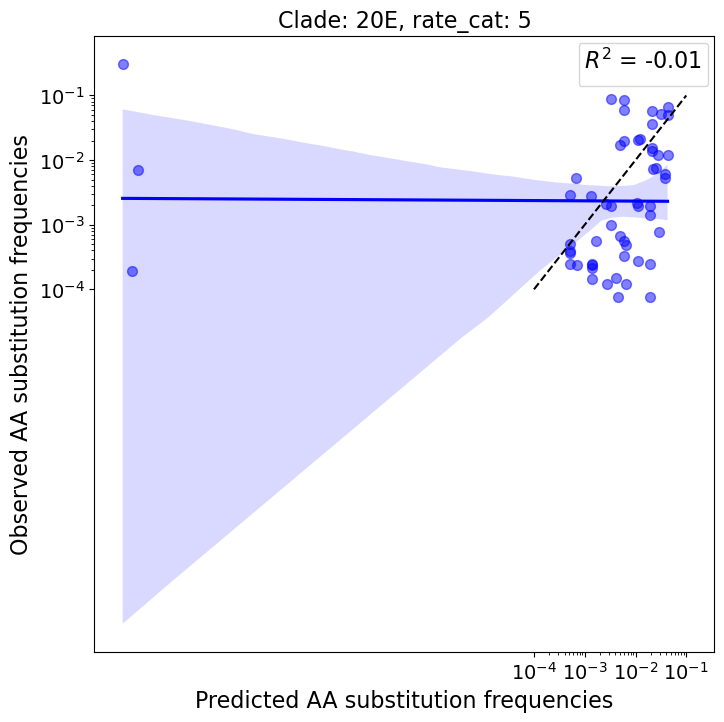

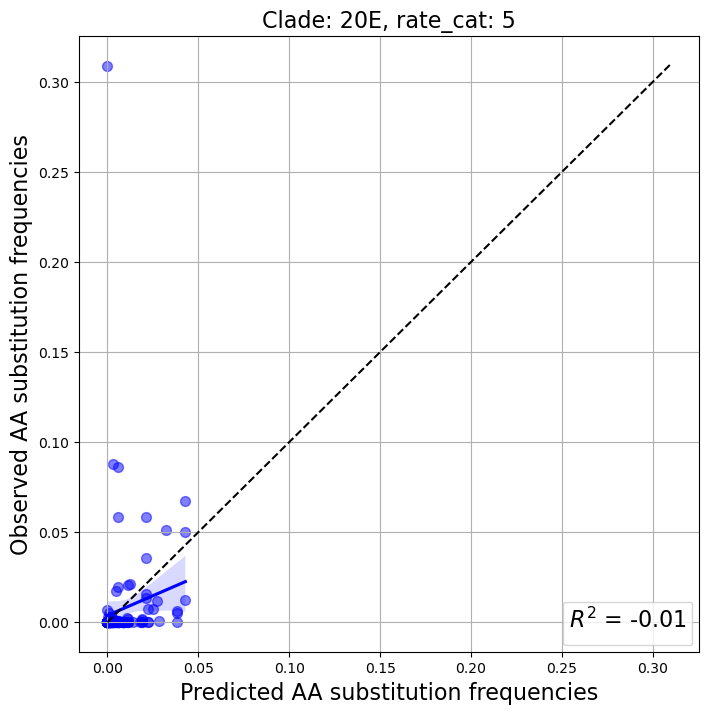

,aa1,aa2,nobs,ref_aa1_freq,nobs_scaled,rate_exp,nexp,diff,pe,nobs_freqs,nexp_freqs,obs_relative_freq,grantham_distance,clade,rate_cat
3390,Lys,Met,0,0.0,0.0,1.000000e-10,1.290220e-09,-1.290220e-09,-inf,0.0,3.934800e-13,0.0,95,20E,5
3397,Met,Val,0,0.0,0.0,1.000000e-10,1.290220e-09,-1.290220e-09,-inf,0.0,3.934800e-13,0.0,21,20E,5
3389,Lys,Ile,0,0.0,0.0,1.000000e-10,1.290220e-09,-1.290220e-09,-inf,0.0,3.934800e-13,0.0,102,20E,5
3324,Asn,Thr,0,0.0,0.0,2.000000e-10,2.580440e-09,-2.580440e-09,-inf,0.0,7.869600e-13,0.0,65,20E,5
3320,Asn,His,0,0.0,0.0,2.000000e-10,2.580440e-09,-2.580440e-09,-inf,0.0,7.869600e-13,0.0,68,20E,5
3325,Asn,Tyr,0,0.0,0.0,2.000000e-10,2.580440e-09,-2.580440e-09,-inf,0.0,7.869600e-13,0.0,143,20E,5
3326,Asp,Ala,0,0.0,0.0,2.000000e-10,2.580440e-09,-2.580440e-09,-inf,0.0,7.869600e-13,0.0,126,20E,5
3329,Asp,Gly,0,0.0,0.0,2.000000e-10,2.580440e-09,-2.580440e-09,-inf,0.0,7.869600e-13,0.0,94,20E,5
3348,Glu,Gly,0,0.0,0.0,2.000000e-10,2.580440e-09,-2.580440e-09,-inf,0.0,7.869600e-13,0.0,98,20E,5
3350,Glu,Val,0,0.0,0.0,2.000000e-10,2.580440e-09,-2.580440e-09,-inf,0.0,7.869600e-13,0.0,121,20E,5


In [30]:
cur_clade, cur_rate_cat = r2_df.query("-0.1<r2<0").sample(1)[['clade', 'rate_cat']].iloc[0]
aas = aa_subst_total_df.query("clade==@cur_clade and rate_cat==@cur_rate_cat")
plot_subst_freqs(aas, title=f'Clade: {cur_clade}, rate_cat: {cur_rate_cat}')
plot_subst_freqs_linear(aas, title=f'Clade: {cur_clade}, rate_cat: {cur_rate_cat}')
aas.sort_values('nexp_freqs', ascending=True).head(10)

/home/kpotoh/miniforge3/envs/amino-acid-shift/lib/python3.13/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/kpotoh/mitofungen/sars-cov-2/1sars-cov-2/utils.py:631: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f"$R^2$ = {r2:.2f}", title_fontsize=16)


-0.7925974555070885
Pearson correlation: 0.450 (p-value: 7.59e-09)
Spearman correlation: 0.524 (p-value: 5.93e-12)


/tmp/ipykernel_14053/382490758.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f"$R^2$ = {r2:.2f}", title_fontsize=16)


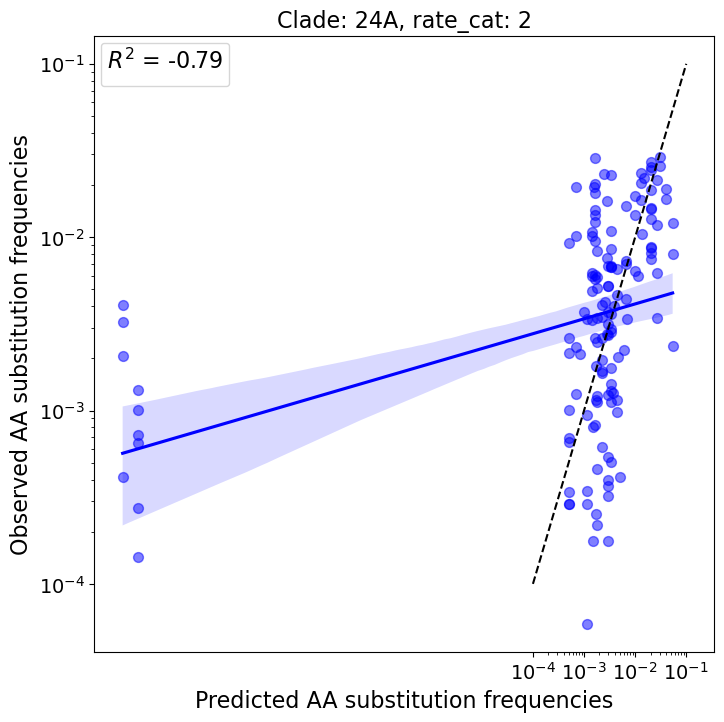

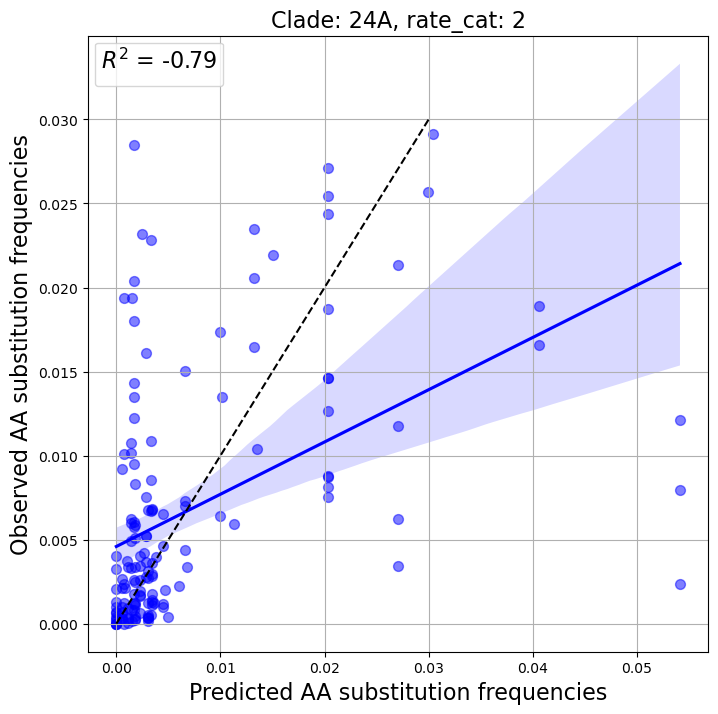

,aa1,aa2,nobs,ref_aa1_freq,nobs_scaled,rate_exp,nexp,diff,pe,nobs_freqs,nexp_freqs,obs_relative_freq,grantham_distance,clade,rate_cat
20971,Ser,Trp,0,0.000000,0.00000,1.000000e-10,5.231510e-09,-5.231510e-09,-inf,0.000000,4.681860e-13,0.000000e+00,177,24A,2
20985,Trp,Ser,0,0.000000,0.00000,1.000000e-10,5.231510e-09,-5.231510e-09,-inf,0.000000,4.681860e-13,0.000000e+00,177,24A,2
20890,Gln,Glu,32,0.042842,36.27650,2.000000e-10,1.046300e-08,3.627650e+01,100.0,0.003247,9.363720e-13,3.467110e+09,29,24A,2
20880,Asp,His,19,0.039995,23.07250,2.000000e-10,1.046300e-08,2.307250e+01,100.0,0.002065,9.363720e-13,2.205140e+09,81,24A,2
20911,His,Asp,0,0.000000,0.00000,2.000000e-10,1.046300e-08,-1.046300e-08,-inf,0.000000,9.363720e-13,0.000000e+00,81,24A,2
20897,Glu,Gln,48,0.051654,45.13140,2.000000e-10,1.046300e-08,4.513140e+01,100.0,0.004039,9.363720e-13,4.313420e+09,29,24A,2
20974,Thr,Arg,0,0.000000,0.00000,2.000000e-10,1.046300e-08,-1.046300e-08,-inf,0.000000,9.363720e-13,0.000000e+00,71,24A,2
20867,Arg,Thr,3,0.031589,4.61241,2.000000e-10,1.046300e-08,4.612410e+00,100.0,0.000413,9.363720e-13,4.408290e+08,71,24A,2
20901,Gly,Ala,13,0.043248,14.59870,4.000000e-10,2.092600e-08,1.459870e+01,100.0,0.001306,1.872740e-12,6.976340e+08,60,24A,2
20954,Pro,Ala,7,0.030369,11.19470,4.000000e-10,2.092600e-08,1.119470e+01,100.0,0.001002,1.872740e-12,5.349650e+08,27,24A,2


In [47]:
cur_clade, cur_rate_cat = r2_df.query("-1<r2<-0.0").sample(1)[['clade', 'rate_cat']].iloc[0]
aas = aa_subst_total_df.query("clade==@cur_clade and rate_cat==@cur_rate_cat")
plot_subst_freqs(aas, title=f'Clade: {cur_clade}, rate_cat: {cur_rate_cat}')
plot_subst_freqs_linear(aas, title=f'Clade: {cur_clade}, rate_cat: {cur_rate_cat}')
aas.sort_values('nexp_freqs', ascending=True).head(10)

/home/kpotoh/miniforge3/envs/amino-acid-shift/lib/python3.13/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/kpotoh/mitofungen/sars-cov-2/1sars-cov-2/utils.py:631: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f"$R^2$ = {r2:.2f}", title_fontsize=16)
/tmp/ipykernel_14053/382490758.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f"$R^2$ = {r2:.2f}", title_fontsize=16)


-5.775436269215075
Pearson correlation: 0.342 (p-value: 1.88e-05)
Spearman correlation: 0.482 (p-value: 4.18e-10)


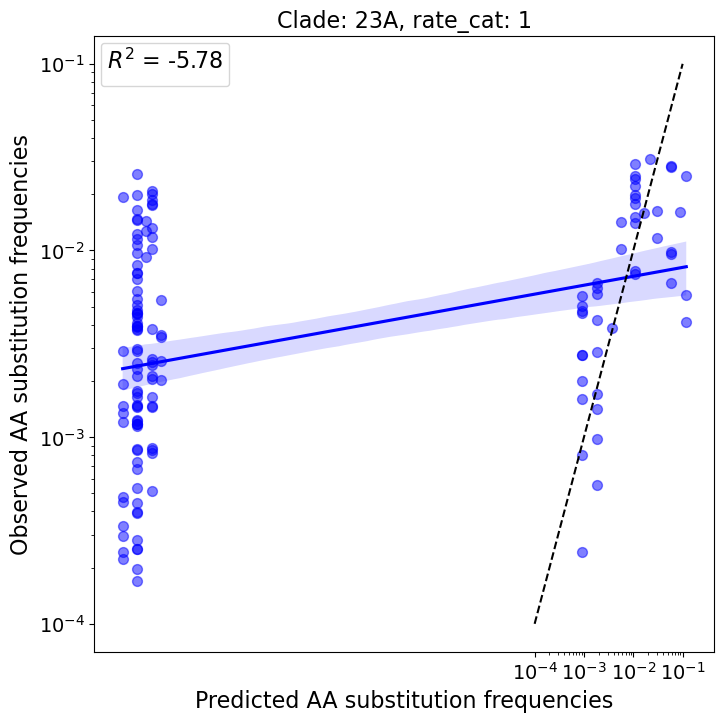

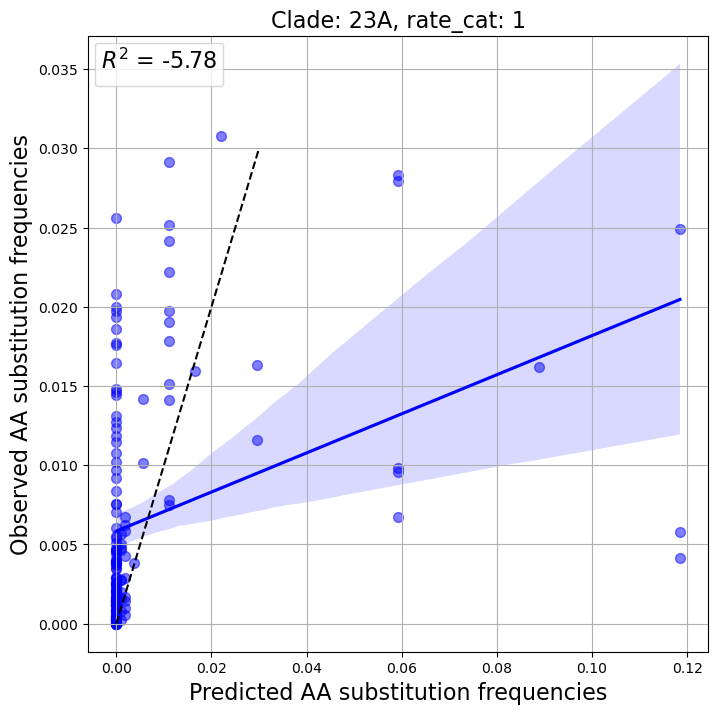

,aa1,aa2,nobs,ref_aa1_freq,nobs_scaled,rate_exp,nexp,diff,pe,nobs_freqs,nexp_freqs,obs_relative_freq,grantham_distance,clade,rate_cat
16514,Arg,Met,1,0.029794,1.60040,1.000000e-10,2.922110e-09,1.600400e+00,100.0,0.000244,4.455110e-13,5.476860e+08,91,23A,1
16511,Arg,Ile,6,0.029794,9.60238,1.000000e-10,2.922110e-09,9.602380e+00,100.0,0.001464,4.455110e-13,3.286120e+09,97,23A,1
16557,Gly,Trp,0,0.000000,0.00000,1.000000e-10,2.922110e-09,-2.922110e-09,-inf,0.000000,4.455110e-13,0.000000e+00,184,23A,1
16592,Met,Arg,2,0.030236,3.15395,1.000000e-10,2.922110e-09,3.153950e+00,100.0,0.000481,4.455110e-13,1.079340e+09,91,23A,1
16583,Leu,Trp,8,0.128761,2.96248,1.000000e-10,2.922110e-09,2.962480e+00,100.0,0.000452,4.455110e-13,1.013820e+09,61,23A,1
16595,Met,Lys,5,0.030236,7.88488,1.000000e-10,2.922110e-09,7.884880e+00,100.0,0.001202,4.455110e-13,2.698360e+09,95,23A,1
16569,Ile,Lys,3,0.065192,2.19421,1.000000e-10,2.922110e-09,2.194210e+00,100.0,0.000335,4.455110e-13,7.509000e+08,102,23A,1
16566,Ile,Arg,2,0.065192,1.46281,1.000000e-10,2.922110e-09,1.462810e+00,100.0,0.000223,4.455110e-13,5.006000e+08,97,23A,1
16621,Ser,Trp,0,0.000000,0.00000,1.000000e-10,2.922110e-09,-2.922110e-09,-inf,0.000000,4.455110e-13,0.000000e+00,177,23A,1
16634,Trp,Leu,20,0.007522,126.77700,1.000000e-10,2.922110e-09,1.267770e+02,100.0,0.019329,4.455110e-13,4.338530e+10,61,23A,1


In [36]:
cur_clade, cur_rate_cat = r2_df.query("r2<-1.5").sample(1)[['clade', 'rate_cat']].iloc[0]
aas = aa_subst_total_df.query("clade==@cur_clade and rate_cat==@cur_rate_cat")
plot_subst_freqs(aas, title=f'Clade: {cur_clade}, rate_cat: {cur_rate_cat}')
plot_subst_freqs_linear(aas, title=f'Clade: {cur_clade}, rate_cat: {cur_rate_cat}')
aas.sort_values('nexp_freqs', ascending=True).head(10)

/home/kpotoh/miniforge3/envs/amino-acid-shift/lib/python3.13/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/kpotoh/mitofungen/sars-cov-2/1sars-cov-2/utils.py:631: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f"$R^2$ = {r2:.2f}", title_fontsize=16)


-3.1974325600589975
Pearson correlation: 0.237 (p-value: 0.00347)
Spearman correlation: 0.247 (p-value: 0.00231)


/tmp/ipykernel_11790/382490758.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f"$R^2$ = {r2:.2f}", title_fontsize=16)


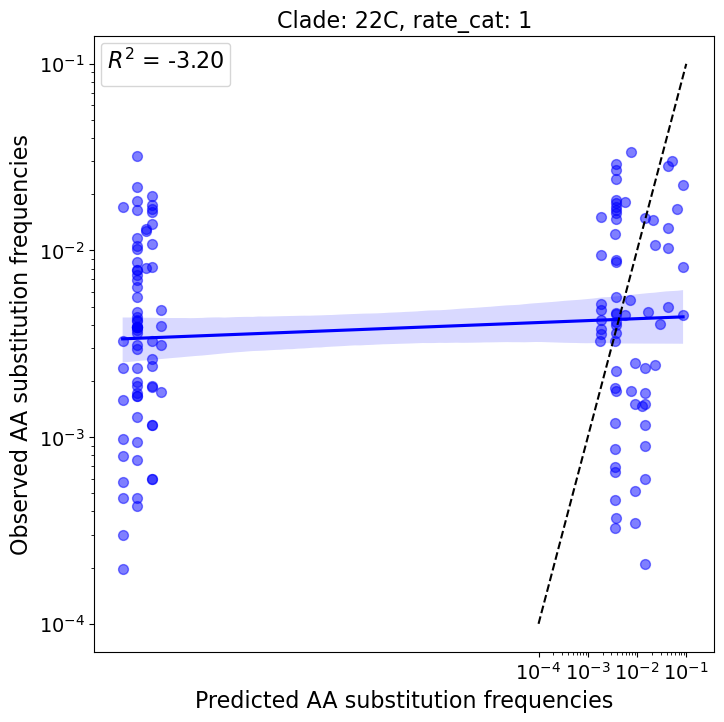

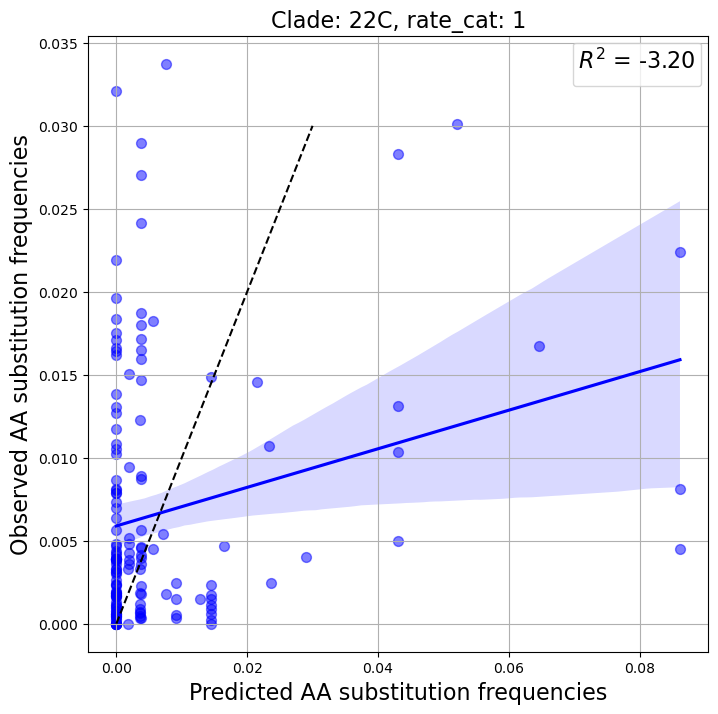

<Axes: title={'center': 'Clade: 22C, rate_cat: 1'}, xlabel='Predicted AA substitution frequencies', ylabel='Observed AA substitution frequencies'>

In [ ]:
cur_clade, cur_rate_cat = r2_df.query("r2<-0.5").sample(1)[['clade', 'rate_cat']].iloc[0]
aas = aa_subst_total_df.query("clade==@cur_clade and rate_cat==@cur_rate_cat")
plot_subst_freqs(aas, title=f'Clade: {cur_clade}, rate_cat: {cur_rate_cat}')
plot_subst_freqs_linear(aas, title=f'Clade: {cur_clade}, rate_cat: {cur_rate_cat}')

In [ ]:
aas.sort_values('nexp_freqs', ascending=True).head(10)

,aa1,aa2,nobs,ref_aa1_freq,nobs_scaled,rate_exp,nexp,diff,pe,nobs_freqs,nexp_freqs,obs_relative_freq,grantham_distance,clade,rate_cat
13064,Arg,Met,1,0.030693,1.559390,1.000000e-10,1.189840e-09,1.559390e+00,100.0,0.000470,3.582780e-13,1.310590e+09,91,22C,1
13061,Arg,Ile,7,0.030693,10.915700,1.000000e-10,1.189840e-09,1.091570e+01,100.0,0.003287,3.582780e-13,9.174100e+09,97,22C,1
13107,Gly,Trp,1,0.047921,0.998781,1.000000e-10,1.189840e-09,9.987810e-01,100.0,0.000301,3.582780e-13,8.394250e+08,184,22C,1
13139,Lys,Ile,8,0.072475,5.283170,1.000000e-10,1.189840e-09,5.283170e+00,100.0,0.001591,3.582780e-13,4.440240e+09,102,22C,1
13133,Leu,Trp,5,0.124554,1.921340,1.000000e-10,1.189840e-09,1.921340e+00,100.0,0.000579,3.582780e-13,1.614790e+09,61,22C,1
13142,Met,Arg,5,0.030693,7.796940,1.000000e-10,1.189840e-09,7.796940e+00,100.0,0.002348,3.582780e-13,6.552930e+09,91,22C,1
13140,Lys,Met,4,0.072475,2.641590,1.000000e-10,1.189840e-09,2.641590e+00,100.0,0.000795,3.582780e-13,2.220120e+09,95,22C,1
13116,Ile,Arg,0,0.000000,0.000000,1.000000e-10,1.189840e-09,-1.189840e-09,-inf,0.000000,3.582780e-13,0.000000e+00,97,22C,1
13171,Ser,Trp,0,0.000000,0.000000,1.000000e-10,1.189840e-09,-1.189840e-09,-inf,0.000000,3.582780e-13,0.000000e+00,177,22C,1
13184,Trp,Leu,8,0.006733,56.871800,1.000000e-10,1.189840e-09,5.687180e+01,100.0,0.017125,3.582780e-13,4.779780e+10,61,22C,1
